In [72]:
import pandas as pd

# Read the two CSV files
df1 = pd.read_csv('fraudTrain.csv') #both csvs from real_data_kaggle folder
df2 = pd.read_csv('fraudTest.csv')

# Combine the DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Optionally, save the combined DataFrame to a new CSV
combined_df.to_csv('combined_data.csv', index=False)

# Display the shape to verify
print(f"Combined DataFrame shape: {combined_df.shape}")

Combined DataFrame shape: (1852394, 23)


In [230]:
import pandas as pd
df= pd.read_csv('combined_data.csv')

# 1. Understand Your Data

In [74]:
pd.concat([df.head(2),df.tail(2)])

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1852392,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
1852393,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [76]:
df['cc_num'].describe()

count    1.852394e+06
mean     4.173860e+17
std      1.309115e+18
min      6.041621e+10
25%      1.800429e+14
50%      3.521417e+15
75%      4.642255e+15
max      4.992346e+18
Name: cc_num, dtype: float64

In [77]:
df['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [78]:
# Check unique value counts for all columns
unique_counts = df.nunique()
# Display the results
print(unique_counts)

# # View unique values of a specific column, e.g., 'category'
# unique_values = df['category'].unique()
# print(unique_values)

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64


# 2. Data Cleaning

In [79]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [80]:
df.duplicated().sum()

0

In [81]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 23 columns]


In [231]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   trans_date_trans_time  datetime64[ns]
 2   cc_num                 int64         
 3   merchant               object        
 4   category               object        
 5   amt                    float64       
 6   first                  object        
 7   last                   object        
 8   gender                 object        
 9   street                 object        
 10  city                   object        
 11  state                  object        
 12  zip                    int64         
 13  lat                    float64       
 14  long                   float64       
 15  city_pop               int64         
 16  job                    object        
 17  dob                    datetime64[ns]
 18  trans_num             

# 3. Feature Engineering

In [232]:
from datetime import datetime

# Calculate age of the customer at the time of the transaction
current_date = datetime.now()  # or use a fixed reference date if needed
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

In [148]:
df.head(4)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,30
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,56
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,52


In [233]:
# Extract useful features from transaction datetime
df['trans_hour'] = df['trans_date_trans_time'].dt.hour  # Hour of the transaction
df['trans_day_of_week'] = df['trans_date_trans_time'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
df['trans_weekend'] = df['trans_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Weekend indicator (1=Weekend, 0=Weekday)
df['trans_month'] = df['trans_date_trans_time'].dt.month  # Month of the transaction

In [150]:
df.head(4)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,trans_hour,trans_day_of_week,trans_weekend,trans_month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,30,0,1,0,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40,0,1,0,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,56,0,1,0,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,52,0,1,0,1


In [234]:
import numpy as np
from scipy.spatial.distance import cdist

def haversine_vectorized(points1, points2):
    """
    Calculate the Haversine distance between two arrays of latitude/longitude points.
    Parameters:
        points1: Array of shape (n, 2) with latitudes and longitudes of first set of points
        points2: Array of shape (n, 2) with latitudes and longitudes of second set of points
    Returns:
        Array of distances in kilometers
    """
    # Convert degrees to radians
    points1 = np.radians(points1)
    points2 = np.radians(points2)

    # Extract latitudes and longitudes
    lat1, lon1 = points1[:, 0], points1[:, 1]
    lat2, lon2 = points2[:, 0], points2[:, 1]

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    radius_earth_km = 6371  # Radius of Earth in kilometers
    return radius_earth_km * c

# Prepare data
customer_points = df[['lat', 'long']].values  # Customer latitude and longitude
merchant_points = df[['merch_lat', 'merch_long']].values  # Merchant latitude and longitude

# Calculate distances
df['distance'] = haversine_vectorized(customer_points, merchant_points)

In [152]:
df.head(4)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,age,trans_hour,trans_day_of_week,trans_weekend,trans_month,distance
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1325376018,36.011293,-82.048315,0,30,0,1,0,1,78.597568
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1325376044,49.159047,-118.186462,0,40,0,1,0,1,30.212176
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1325376051,43.150704,-112.154481,0,56,0,1,0,1,108.206083
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1325376076,47.034331,-112.561071,0,52,0,1,0,1,95.673231


In [235]:
# Aggregate by cc_num (Credit Card Number)
cc_aggregates = df.groupby('cc_num').agg(
    avg_amt=('amt', 'mean'),                  # Average transaction amount
    total_transactions=('amt', 'count'),     # Total number of transactions
    total_fraud=('is_fraud', 'sum'),         # Total number of fraudulent transactions
    fraud_rate=('is_fraud', 'mean')          # Fraud rate (fraction of fraudulent transactions)
).reset_index()

# Merge the aggregated features back into the original DataFrame
df = df.merge(cc_aggregates, on='cc_num', how='left')

In [154]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,age,trans_hour,trans_day_of_week,trans_weekend,trans_month,distance,avg_amt,total_transactions,total_fraud,fraud_rate
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,30,0,1,0,1,78.597568,89.408743,2927,11,0.003758
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,40,0,1,0,1,30.212176,56.078113,4362,7,0.001605
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,56,0,1,0,1,108.206083,69.924272,735,8,0.010884
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,52,0,1,0,1,95.673231,80.090040,743,15,0.020188
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,32,0,1,0,1,77.556744,95.341146,2922,13,0.004449


In [155]:
# Get the count of unique values for all columns
unique_counts = df.nunique()
print(unique_counts)

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
age                           84
trans_hour                    24
trans_day_of_week              7
trans_weekend                  2
trans_month                   12
distance                 1852394
avg_amt                      999
total_tran

In [236]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize LabelEncoders
merchant_encoder = LabelEncoder()
job_encoder = LabelEncoder()

# Fit and transform the columns
df['merchant_encoded'] = merchant_encoder.fit_transform(df['merchant'])
df['job_encoded'] = job_encoder.fit_transform(df['job'])

# Create reference tables for encoded values
merchant_reference = pd.DataFrame({
    'merchant': merchant_encoder.classes_,
    'merchant_encoded': range(len(merchant_encoder.classes_))
})

job_reference = pd.DataFrame({
    'job': job_encoder.classes_,
    'job_encoded': range(len(job_encoder.classes_))
})

In [157]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_day_of_week,trans_weekend,trans_month,distance,avg_amt,total_transactions,total_fraud,fraud_rate,merchant_encoded,job_encoded
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1,0,1,78.597568,89.408743,2927,11,0.003758,514,372
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1,0,1,30.212176,56.078113,4362,7,0.001605,241,431
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1,0,1,108.206083,69.924272,735,8,0.010884,390,308
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1,0,1,95.673231,80.090040,743,15,0.020188,360,330
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1,0,1,77.556744,95.341146,2922,13,0.004449,297,116


In [237]:
# Save reference tables to CSV
merchant_reference.to_csv('merchant_reference.csv', index=False)
job_reference.to_csv('job_reference.csv', index=False)

# Confirm save success
print("\nReference tables have been successfully saved as 'merchant_reference.csv' and 'job_reference.csv'.")


Reference tables have been successfully saved as 'merchant_reference.csv' and 'job_reference.csv'.


In [238]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['category'], df['is_fraud'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

Chi-square statistic: 8329.139945520074, p-value: 0.0


In [239]:
import pandas as pd

# Perform One-Hot Encoding for 'category'
category_encoded = pd.get_dummies(df['category'], prefix='category')

# Concatenate the one-hot encoded columns back to the original DataFrame
df = pd.concat([df, category_encoded], axis=1)

In [162]:
pd.concat([df.head(2),df.tail(2)])

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,False,False,False,False,True,False,False,False,False,False
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,True,False,False,False,False,False,False,False,False,False
1852392,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,False,False,False,False,False,False,False,False,False,True
1852393,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,False,False,False,False,False,False,False,False,False,False


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 49 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Unnamed: 0               int64         
 1   trans_date_trans_time    datetime64[ns]
 2   cc_num                   int64         
 3   merchant                 object        
 4   category                 object        
 5   amt                      float64       
 6   first                    object        
 7   last                     object        
 8   gender                   object        
 9   street                   object        
 10  city                     object        
 11  state                    object        
 12  zip                      int64         
 13  lat                      float64       
 14  long                     float64       
 15  city_pop                 int64         
 16  job                      object        
 17  dob                      da

In [240]:
df[category_encoded.columns] = df[category_encoded.columns].astype(int)

In [241]:
pd.concat([df.head(2),df.tail(2)])

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0,0,0,0,1,0,0,0,0,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1,0,0,0,0,0,0,0,0,0
1852392,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,0,0,0,0,0,0,0,0,0,1
1852393,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,0,0,0,0,0,0,0,0,0,0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 49 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Unnamed: 0               int64         
 1   trans_date_trans_time    datetime64[ns]
 2   cc_num                   int64         
 3   merchant                 object        
 4   category                 object        
 5   amt                      float64       
 6   first                    object        
 7   last                     object        
 8   gender                   object        
 9   street                   object        
 10  city                     object        
 11  state                    object        
 12  zip                      int64         
 13  lat                      float64       
 14  long                     float64       
 15  city_pop                 int64         
 16  job                      object        
 17  dob                      da

In [167]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age', 'trans_hour',
       'trans_day_of_week', 'trans_weekend', 'trans_month', 'distance',
       'avg_amt', 'total_transactions', 'total_fraud', 'fraud_rate',
       'merchant_encoded', 'job_encoded', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')

In [242]:
columns_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'dob', 'merchant', 'category', 'job', 'first', 'last', 'unix_time', 'street', 'city', 'state', 'zip', 'lat', 'long', 'merch_lat', 'merch_long']
df = df.drop(columns=columns_to_drop, axis=1)
# 'trans_num'

In [243]:
unique_counts = df.nunique()
print(unique_counts)

cc_num                         999
amt                          60616
gender                           2
city_pop                       891
trans_num                  1852394
is_fraud                         2
age                             84
trans_hour                      24
trans_day_of_week                7
trans_weekend                    2
trans_month                     12
distance                   1852394
avg_amt                        999
total_transactions             140
total_fraud                     18
fraud_rate                     416
merchant_encoded               693
job_encoded                    497
category_entertainment           2
category_food_dining             2
category_gas_transport           2
category_grocery_net             2
category_grocery_pos             2
category_health_fitness          2
category_home                    2
category_kids_pets               2
category_misc_net                2
category_misc_pos                2
category_personal_ca

In [244]:
print(df['gender'].unique())

['F' 'M']


In [245]:
print(df['gender'].value_counts())

gender
F    1014749
M     837645
Name: count, dtype: int64


In [246]:
# Test the transformation without modifying the original column
test_gender = df['gender'].apply(lambda x: 1 if str(x).strip().upper() == "M" else 0)

# Verify the transformation
print(test_gender.value_counts())

gender
0    1014749
1     837645
Name: count, dtype: int64


In [247]:
# Assign the tested transformation back to the gender column
df['gender'] = test_gender

# Verify the updated gender column
print(df['gender'].value_counts())

gender
0    1014749
1     837645
Name: count, dtype: int64


In [248]:
df.head(5)

,cc_num,amt,gender,city_pop,trans_num,is_fraud,age,trans_hour,trans_day_of_week,trans_weekend,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,4.97,0,3495,0b242abb623afc578575680df30655b9,0,30,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,630423337322,107.23,0,149,1f76529f8574734946361c461b024d99,0,40,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,38859492057661,220.11,1,4154,a1a22d70485983eac12b5b88dad1cf95,0,56,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,1,1939,6b849c168bdad6f867558c3793159a81,0,52,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,375534208663984,41.96,1,99,a41d7549acf90789359a9aa5346dcb46,0,32,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   cc_num                   int64  
 1   amt                      float64
 2   gender                   int64  
 3   city_pop                 int64  
 4   trans_num                object 
 5   is_fraud                 int64  
 6   age                      int64  
 7   trans_hour               int32  
 8   trans_day_of_week        int32  
 9   trans_weekend            int64  
 10  trans_month              int32  
 11  distance                 float64
 12  avg_amt                  float64
 13  total_transactions       int64  
 14  total_fraud              int64  
 15  fraud_rate               float64
 16  merchant_encoded         int32  
 17  job_encoded              int32  
 18  category_entertainment   int32  
 19  category_food_dining     int32  
 20  category_gas_transport   int32  
 21  category

In [250]:
df.to_csv('cleaning_FeatureEngg.csv', index=False) #with trans_num

In [251]:
columns_to_drop = ['trans_num']
df = df.drop(columns=columns_to_drop, axis=1)

In [252]:
df.to_csv('cleaning_FeatureEngg2.csv', index=False) #without trans_num

# 4. EDA (Exploratory Data Analysis)

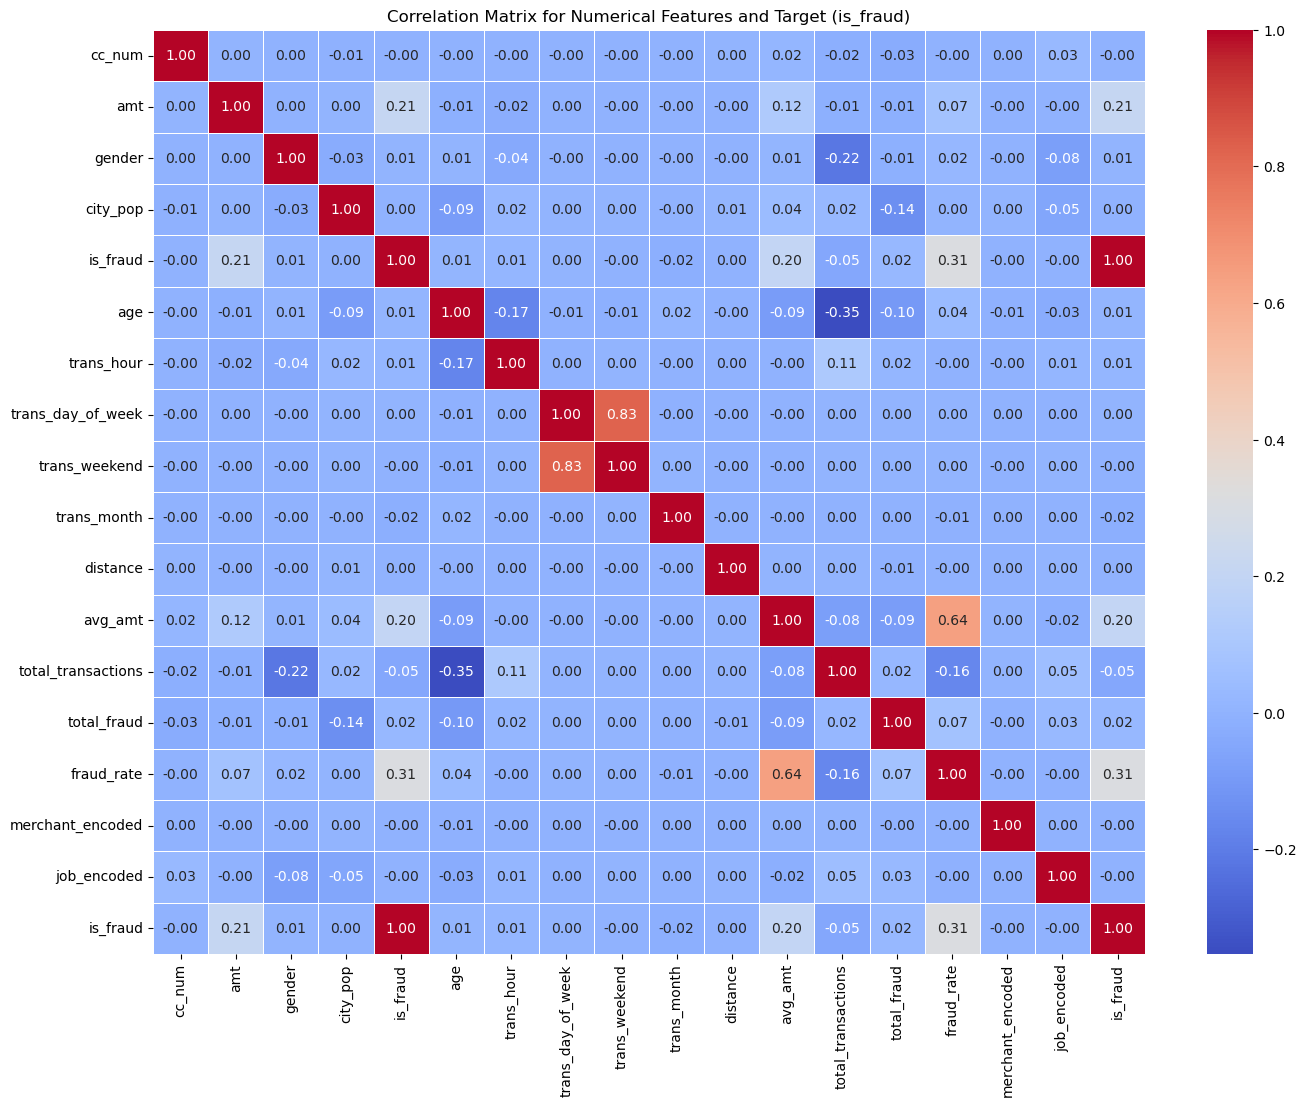

In [253]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = ['cc_num', 'amt', 'gender', 'city_pop', 'is_fraud', 'age', 'trans_hour', 'trans_day_of_week',
       'trans_weekend', 'trans_month', 'distance', 'avg_amt',
       'total_transactions', 'total_fraud', 'fraud_rate', 'merchant_encoded',
       'job_encoded']

# Including the target variable 'is_fraud' for correlation analysis
numerical_columns_with_target = numerical_columns + ['is_fraud']

# 1. Correlation matrix for numerical features using Pearson or Spearman correlation
corr_matrix = df[numerical_columns_with_target].corr(method='pearson')  # Change to 'spearman' if needed

# Plotting the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features and Target (is_fraud)')
plt.show()

In [254]:
print(df.groupby('gender')['is_fraud'].mean())

gender
0    0.004828
1    0.005673
Name: is_fraud, dtype: float64


is_fraud
0    1842743
1       9651
Name: count, dtype: int64


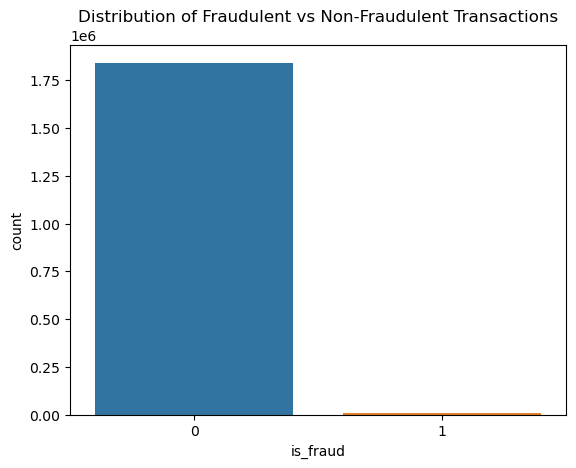

In [255]:
# Count the number of fraudulent vs non-fraudulent transactions
print(df['is_fraud'].value_counts())

# Plot the distribution of fraud vs non-fraud
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

# 5. Split Data into Training and Testing Sets

In [256]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('is_fraud', axis=1)  # All columns except the target
y = df['is_fraud']  # Target column

# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the sizes of the resulting datasets
print(f"Training Features: {X_train.shape}, Training Labels: {y_train.shape}")
print(f"Testing Features: {X_test.shape}, Testing Labels: {y_test.shape}")

Training Features: (1481915, 30), Training Labels: (1481915,)
Testing Features: (370479, 30), Testing Labels: (370479,)


In [257]:
# Save the training data
X_train.to_csv('X_train.csv', index=False)  # Features for training
y_train.to_csv('y_train.csv', index=False)  # Labels for training

# Save the testing data
X_test.to_csv('X_test.csv', index=False)    # Features for testing
y_test.to_csv('y_test.csv', index=False)    # Labels for testing

print("Data has been saved to CSV files successfully.")

Data has been saved to CSV files successfully.


In [258]:
# Check the class distribution in the original dataset
original_distribution = y.value_counts(normalize=True)

# Check the class distribution in the training set
train_distribution = y_train.value_counts(normalize=True)

# Check the class distribution in the testing set
test_distribution = y_test.value_counts(normalize=True)

# Display the results
print("Original Class Distribution:")
print(original_distribution)

print("\nTraining Set Class Distribution:")
print(train_distribution)

print("\nTesting Set Class Distribution:")
print(test_distribution)

Original Class Distribution:
is_fraud
0    0.99479
1    0.00521
Name: proportion, dtype: float64

Training Set Class Distribution:
is_fraud
0    0.99479
1    0.00521
Name: proportion, dtype: float64

Testing Set Class Distribution:
is_fraud
0    0.994791
1    0.005209
Name: proportion, dtype: float64


# Model Training

# Gradient Boosting Machines (GBMs): LightGBM

In [157]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 660.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 1.3 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 1.9 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 2.2 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 2.7 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.4 MB 2.7 MB/s eta 0:00:01
   ------------------------- -------------- 0.9/1.4 MB 2.9 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 3.0 MB/s eta 0:00:01
   ------------------------------------ --- 1

In [185]:
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize the LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42, class_weight='balanced')

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred = lgb_model.predict(X_test)
y_pred_prob = lgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Info] Number of positive: 7721, number of negative: 1474194
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2335
[LightGBM] [Info] Number of data points in the train set: 1481915, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    368549
           1       0.27      0.99      0.43      1930

    accuracy                           0.99    370479
   macro avg       0.64      0.99      0.71    370479
weighted avg       1.00      0.99      0.99    370479

AUC-ROC Score: 0.998994474297236
Confusion Matrix:
[[363518   5031]
 [    28   1902]]


# Random Forest
It is a robust and widely used ensemble model for classification tasks like fraud detection. Random Forest works by combining multiple decision trees and can handle imbalanced datasets well.

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    368549
           1       0.19      0.94      0.32      1930

    accuracy                           0.98    370479
   macro avg       0.60      0.96      0.65    370479
weighted avg       1.00      0.98      0.99    370479



In [187]:
# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

AUC-ROC Score: 0.9918424490260833
Confusion Matrix:
[[360857   7692]
 [   109   1821]]


In [188]:
# Feature Importance
importances = rf_model.feature_importances_
feature_importances = sorted(zip(X_train.columns, importances), key=lambda x: x[1], reverse=True)
print("\nTop 10 Features by Importance:")
for feature, importance in feature_importances[:10]:
    print(f"{feature}: {importance}")


Top 10 Features by Importance:
amt: 0.5705925256496874
trans_hour: 0.1912094226026861
fraud_rate: 0.04574052268886596
total_transactions: 0.027020487030608137
avg_amt: 0.02327780162060262
category_gas_transport: 0.019107966266206415
category_shopping_net: 0.01692792506106694
category_grocery_pos: 0.01619855607778463
total_fraud: 0.011077144593501788
category_home: 0.008134072587154453


In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # Start with 100 trees
    max_depth=15,      # Medium-depth trees
    random_state=42,
    class_weight='balanced',  # Handle class imbalance
    n_jobs=-1          # Parallel processing
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    368549
           1       0.45      0.92      0.61      1930

    accuracy                           0.99    370479
   macro avg       0.73      0.96      0.80    370479
weighted avg       1.00      0.99      0.99    370479



In [190]:
# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

AUC-ROC Score: 0.9960254411513281
Confusion Matrix:
[[366414   2135]
 [   161   1769]]


# XGBoost (Extreme Gradient Boosting)
another powerful and widely-used model for structured/tabular data, particularly in fraud detection tasks.

In [191]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,          # Number of trees
    max_depth=10,              # Maximum tree depth
    learning_rate=0.1,         # Step size for weight updates
    scale_pos_weight=10,       # Balances the imbalanced dataset
    subsample=0.8,             # Fraction of samples used per tree
    colsample_bytree=0.8,      # Fraction of features used per tree
    random_state=42,
    use_label_encoder=False,   # Avoids deprecation warnings
    eval_metric='logloss'      # Evaluation metric
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.85      0.90      0.87      1930

    accuracy                           1.00    370479
   macro avg       0.92      0.95      0.94    370479
weighted avg       1.00      1.00      1.00    370479

AUC-ROC Score: 0.9991932330283849
Confusion Matrix:
[[368240    309]
 [   190   1740]]


# Model Validation and Tuning:

In [192]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"Optimal scale_pos_weight: {scale_pos_weight}")

Optimal scale_pos_weight: 190.9330397616889


In [193]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,          # Number of trees
    max_depth=10,              # Maximum tree depth
    learning_rate=0.1,         # Step size for weight updates
    scale_pos_weight=190,       # Balances the imbalanced dataset
    subsample=0.8,             # Fraction of samples used per tree
    colsample_bytree=0.8,      # Fraction of features used per tree
    random_state=42,
    use_label_encoder=False,   # Avoids deprecation warnings
    eval_metric='logloss'      # Evaluation metric
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.53      0.96      0.68      1930

    accuracy                           1.00    370479
   macro avg       0.77      0.98      0.84    370479
weighted avg       1.00      1.00      1.00    370479

AUC-ROC Score: 0.9989366913296461
Confusion Matrix:
[[366926   1623]
 [    86   1844]]


In [194]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=200,          # Number of trees
    max_depth=10,              # Maximum tree depth
    learning_rate=0.05,         # Step size for weight updates
    scale_pos_weight=10,       # Balances the imbalanced dataset
    subsample=0.8,             # Fraction of samples used per tree
    colsample_bytree=0.8,      # Fraction of features used per tree
    random_state=42,
    use_label_encoder=False,   # Avoids deprecation warnings
    eval_metric='logloss'      # Evaluation metric
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.86      0.90      0.88      1930

    accuracy                           1.00    370479
   macro avg       0.93      0.95      0.94    370479
weighted avg       1.00      1.00      1.00    370479

AUC-ROC Score: 0.9992382815583594
Confusion Matrix:
[[368257    292]
 [   188   1742]]


In [ ]:
!pip install shap

In [195]:
X_train.columns

Index(['cc_num', 'amt', 'gender', 'city_pop', 'age', 'trans_hour',
       'trans_day_of_week', 'trans_weekend', 'trans_month', 'distance',
       'avg_amt', 'total_transactions', 'total_fraud', 'fraud_rate',
       'merchant_encoded', 'job_encoded', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')

In [196]:
X_test.columns

Index(['cc_num', 'amt', 'gender', 'city_pop', 'age', 'trans_hour',
       'trans_day_of_week', 'trans_weekend', 'trans_month', 'distance',
       'avg_amt', 'total_transactions', 'total_fraud', 'fraud_rate',
       'merchant_encoded', 'job_encoded', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')

In [197]:
import numpy as np

# Calculate correlation matrix
correlation_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than a threshold (e.g., 0.95)
highly_correlated_features = [column for column in upper.columns if any(upper[column] > 0.95)]

print("Highly correlated features to drop:", highly_correlated_features)

Highly correlated features to drop: []


In [53]:
# Drop highly correlated features ONLY RUN IF Highly correlated features FOUND (SKIPPING FOR NOW)
X_train.drop(columns=highly_correlated_features, inplace=True)
X_test.drop(columns=highly_correlated_features, inplace=True)

In [198]:
len(X_test.columns)

30

In [199]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=200,          # Number of trees
    max_depth=10,              # Maximum tree depth
    learning_rate=0.1,         # Step size for weight updates
    scale_pos_weight=10,       # Balances the imbalanced dataset
    subsample=0.8,             # Fraction of samples used per tree
    colsample_bytree=0.8,      # Fraction of features used per tree
    random_state=42,
    use_label_encoder=False,   # Avoids deprecation warnings
    eval_metric='logloss'      # Evaluation metric
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.92      0.89      0.90      1930

    accuracy                           1.00    370479
   macro avg       0.96      0.94      0.95    370479
weighted avg       1.00      1.00      1.00    370479

AUC-ROC Score: 0.999348616223682
Confusion Matrix:
[[368399    150]
 [   216   1714]]


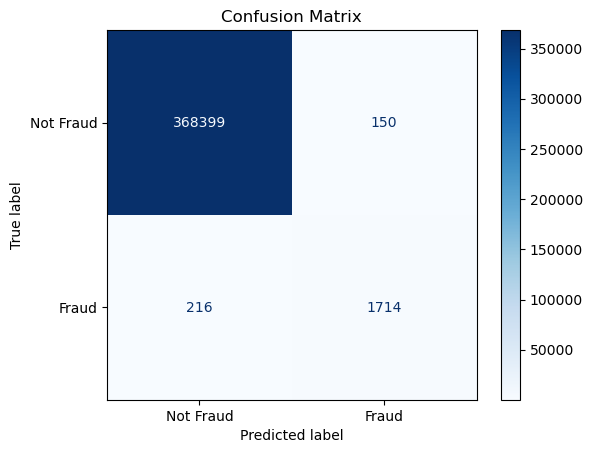

In [200]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predicted values with the current threshold
y_pred = xgb_model.predict(X_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [201]:
from sklearn.metrics import classification_report

# Evaluate and print classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.92      0.89      0.90      1930

    accuracy                           1.00    370479
   macro avg       0.96      0.94      0.95    370479
weighted avg       1.00      1.00      1.00    370479



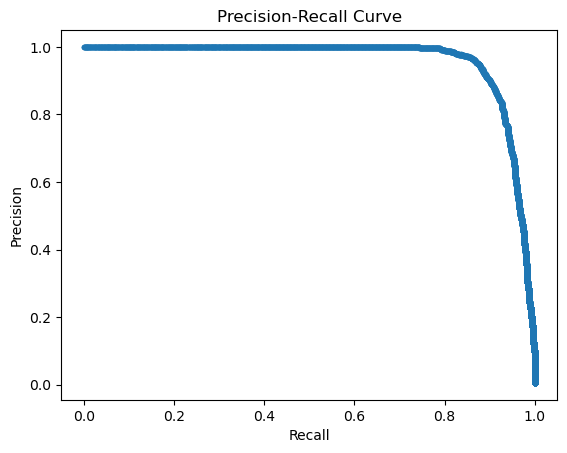

In [202]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [203]:
from sklearn.metrics import average_precision_score

pr_auc = average_precision_score(y_test, y_pred_prob)
print(f"Precision-Recall AUC Score: {pr_auc}")

Precision-Recall AUC Score: 0.957409124822222


In [259]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve
import numpy as np

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=200,          # Number of trees
    max_depth=10,              # Maximum tree depth
    learning_rate=0.1,         # Step size for weight updates
    scale_pos_weight=10,       # Balances the imbalanced dataset
    subsample=0.8,             # Fraction of samples used per tree
    colsample_bytree=0.8,      # Fraction of features used per tree
    random_state=42,
    use_label_encoder=False,   # Avoids deprecation warnings
    eval_metric='logloss'      # Evaluation metric
)

# Train the model
xgb_model.fit(X_train, y_train)

# 🔄 CHANGED: Get predicted probabilities instead of using predict()
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# 🔄 NEW: Find optimal threshold based on F1-score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
f1_scores = (2 * precision * recall) / (precision + recall + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold based on F1-score: {optimal_threshold}")

# 🔄 CHANGED: Use optimal threshold to get final predictions
y_pred = (y_pred_prob >= optimal_threshold).astype(int)

# Evaluate the model with the adjusted threshold
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred))

# AUC-ROC Score (still uses probabilities)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")

# Confusion Matrix
print("Confusion Matrix with Optimal Threshold:")
print(confusion_matrix(y_test, y_pred))

Optimal Threshold based on F1-score: 0.718947172164917

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.96      0.87      0.91      1930

    accuracy                           1.00    370479
   macro avg       0.98      0.93      0.96    370479
weighted avg       1.00      1.00      1.00    370479

AUC-ROC Score: 0.999348616223682
Confusion Matrix with Optimal Threshold:
[[368483     66]
 [   259   1671]]


In [260]:
#checking which columns we are using for model
print("Model input features:")
print(xgb_model.get_booster().feature_names)

Model input features:
['cc_num', 'amt', 'gender', 'city_pop', 'age', 'trans_hour', 'trans_day_of_week', 'trans_weekend', 'trans_month', 'distance', 'avg_amt', 'total_transactions', 'total_fraud', 'fraud_rate', 'merchant_encoded', 'job_encoded', 'category_entertainment', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel']


In [261]:
import joblib

# Bundle model and threshold
bundle = {
    'model': xgb_model,
    'threshold': optimal_threshold
}

# Save to a single file
joblib.dump(bundle, 'fraud_detection_bundle.pkl')
print("Model and threshold saved in fraud_detection_bundle.pkl")

Model and threshold saved in fraud_detection_bundle.pkl


In [ ]:
# Load bundle
bundle = joblib.load('fraud_detection_bundle.pkl')
model = bundle['model']
threshold = bundle['threshold']

# Example: Predict if a transaction is fraud
sample_transaction = X_test.iloc[0:1]  # Example test input
prob = model.predict_proba(sample_transaction)[:, 1][0]
prediction = int(prob >= threshold)

print(f"Predicted probability: {prob}")
print("Fraud" if prediction == 1 else "Not Fraud")

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   cc_num                   int64  
 1   amt                      float64
 2   gender                   int64  
 3   city_pop                 int64  
 4   is_fraud                 int64  
 5   age                      int64  
 6   trans_hour               int32  
 7   trans_day_of_week        int32  
 8   trans_weekend            int64  
 9   trans_month              int32  
 10  distance                 float64
 11  avg_amt                  float64
 12  total_transactions       int64  
 13  total_fraud              int64  
 14  fraud_rate               float64
 15  merchant_encoded         int32  
 16  job_encoded              int32  
 17  category_entertainment   int32  
 18  category_food_dining     int32  
 19  category_gas_transport   int32  
 20  category_grocery_net     int32  
 21  category

In [263]:
df.to_csv('final_cleaned_data.csv', index=False)

In [264]:
df = pd.read_csv('final_cleaned_data.csv')

In [265]:
df.head()

,cc_num,amt,gender,city_pop,is_fraud,age,trans_hour,trans_day_of_week,trans_weekend,trans_month,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,4.97,0,3495,0,30,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,630423337322,107.23,0,149,0,40,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,38859492057661,220.11,1,4154,0,56,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,1,1939,0,52,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,375534208663984,41.96,1,99,0,32,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [266]:
df.shape

(1852394, 31)

In [313]:
df2 = pd.read_csv('cleaning_FeatureEngg.csv')

In [314]:
df2.shape

(1852394, 32)

In [315]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   cc_num                   int64  
 1   amt                      float64
 2   gender                   int64  
 3   city_pop                 int64  
 4   trans_num                object 
 5   is_fraud                 int64  
 6   age                      int64  
 7   trans_hour               int64  
 8   trans_day_of_week        int64  
 9   trans_weekend            int64  
 10  trans_month              int64  
 11  distance                 float64
 12  avg_amt                  float64
 13  total_transactions       int64  
 14  total_fraud              int64  
 15  fraud_rate               float64
 16  merchant_encoded         int64  
 17  job_encoded              int64  
 18  category_entertainment   int64  
 19  category_food_dining     int64  
 20  category_gas_transport   int64  
 21  category

In [316]:
#Create a smaller CSV file with some rows:
import pandas as pd
df_sample = df2.sample(n=100000, random_state=42)
df_sample.to_csv('sample1.csv', index=False)

In [317]:
df_sample = pd.read_csv(r'sample1.csv')

In [318]:
df.head()

,cc_num,amt,gender,city_pop,is_fraud,age,trans_hour,trans_day_of_week,trans_weekend,trans_month,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,4.97,0,3495,0,30,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,630423337322,107.23,0,149,0,40,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,38859492057661,220.11,1,4154,0,56,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,1,1939,0,52,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,375534208663984,41.96,1,99,0,32,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [319]:
df_sample['is_fraud'].value_counts()

is_fraud
0    99457
1      543
Name: count, dtype: int64

In [320]:
columns_to_drop = ['is_fraud']
df_sample = df_sample.drop(columns=columns_to_drop, axis=1)

In [321]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cc_num                   100000 non-null  int64  
 1   amt                      100000 non-null  float64
 2   gender                   100000 non-null  int64  
 3   city_pop                 100000 non-null  int64  
 4   trans_num                100000 non-null  object 
 5   age                      100000 non-null  int64  
 6   trans_hour               100000 non-null  int64  
 7   trans_day_of_week        100000 non-null  int64  
 8   trans_weekend            100000 non-null  int64  
 9   trans_month              100000 non-null  int64  
 10  distance                 100000 non-null  float64
 11  avg_amt                  100000 non-null  float64
 12  total_transactions       100000 non-null  int64  
 13  total_fraud              100000 non-null  int64  
 14  fraud

In [322]:
# Specify the file path where you want to save the CSV file
file_path = r"C:\kafka-docker\sample1.csv"

# Save the DataFrame to the specified path
df_sample.to_csv(file_path, index=False)
print(f"File saved to {file_path}")

File saved to C:\kafka-docker\sample1.csv


In [284]:
df_sample.columns

Index(['cc_num', 'amt', 'gender', 'city_pop', 'trans_num', 'is_fraud', 'age',
       'trans_hour', 'trans_day_of_week', 'trans_weekend', 'trans_month',
       'distance', 'avg_amt', 'total_transactions', 'total_fraud',
       'fraud_rate', 'merchant_encoded', 'job_encoded',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')

In [285]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cc_num                   800 non-null    int64  
 1   amt                      800 non-null    float64
 2   gender                   800 non-null    int64  
 3   city_pop                 800 non-null    int64  
 4   trans_num                800 non-null    object 
 5   is_fraud                 800 non-null    int64  
 6   age                      800 non-null    int64  
 7   trans_hour               800 non-null    int64  
 8   trans_day_of_week        800 non-null    int64  
 9   trans_weekend            800 non-null    int64  
 10  trans_month              800 non-null    int64  
 11  distance                 800 non-null    float64
 12  avg_amt                  800 non-null    float64
 13  total_transactions       800 non-null    int64  
 14  total_fraud              8

In [221]:
import xgboost
print(xgboost.__version__)

2.0.3


In [222]:
import joblib
print(joblib.__version__)

1.2.0


In [223]:
import sklearn
print(sklearn.__version__)

1.3.0


In [225]:
import numpy as np
import pandas as pd

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)

NumPy version: 1.24.3
Pandas version: 2.0.3


In [229]:
# Check unique value counts for all columns
unique_counts = df_sample.nunique()
# Display the results
print(unique_counts)

cc_num                      874
amt                        3919
gender                        2
city_pop                    796
is_fraud                      2
age                          82
trans_hour                   24
trans_day_of_week             7
trans_weekend                 2
trans_month                  12
distance                   5000
avg_amt                     874
total_transactions          132
total_fraud                  18
fraud_rate                  412
merchant_encoded            691
job_encoded                 461
category_entertainment        2
category_food_dining          2
category_gas_transport        2
category_grocery_net          2
category_grocery_pos          2
category_health_fitness       2
category_home                 2
category_kids_pets            2
category_misc_net             2
category_misc_pos             2
category_personal_care        2
category_shopping_net         2
category_shopping_pos         2
category_travel               2
dtype: i